# Comparing Metrics and Stability

This notebook briefly demonstrates how to use different metrics (in scikit) and compare them between two classification algorithms. Furthermore, it will be shown how the smearing of the input data (i.e. worsening the feature resolution) effects the classification performance.

## Loading the Data and the Models

Once more, we load the dataframe and the models we trained earlier.

In [1]:
import pandas as pd
from joblib import load

print(" ")
print("Load dataframe and classifier...")

data_directory = 'http://hadron.physics.fsu.edu/~dlersch/GlueX_PANDA_EIC_ML_Workshop'
data_name = 'hands_on_data_033_033_033.csv' #---> Change this name to analyze imbalanced data
dataFrame = pd.read_csv(data_directory + '/' + data_name)

my_mlp = load('mlp_classifier.joblib')
my_rf = load('random_forest_classifier.joblib')

print("...done!")
print(" ")


Load dataframe and classifier...
...done!
 


## Load Evaluation Metrics and prepare Data

Feel free to add more / other metrics that you find useful / interesting. Like done before, the input data is normalzed and the semearing values for the stability checks are defined afterwards.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

print("Prepare data and set semaring values...")

used_features = ['var1','var2','var3','var4'] #--> Change the elements here, in order to use different features
X = dataFrame[used_features].values
Y = dataFrame['label'].values

scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

smearing_values = [0.0,0.01,0.025,0.05,0.1,0.25,0.5]

print("...done!")
print("  ")

Prepare data and set semaring values...
...done!
  


## Scan Performances 

Determine performance scores for each classifier and different smearing parameters:

In [3]:
import numpy as np
scanned_mlp_scores = {
    'precision': [],
    'f1': [],
    'acc': [],
    'mcc': []
}

scanned_rf_scores = {
    'precision': [],
    'f1': [],
    'acc': [],
    'mcc': []
}

n_smearing_vals = len(smearing_values)
print("Determine classification performances for " + str(n_smearing_vals) + " different feature smearings...")

#++++++++++++++++++++++++++++++++++++
for s in smearing_values:
    if s != 0.0:
        smearing = np.random.normal(1.0,s,X.shape)
        X = np.multiply(X,smearing)

    mlp_prediction = my_mlp.predict(X)
    rf_prediction = my_rf.predict(X)

    scanned_mlp_scores['precision'].append(precision_score(Y,mlp_prediction,average='macro')) #--> There are differnt options for average that you might want to explore
    scanned_mlp_scores['f1'].append(f1_score(Y,mlp_prediction,average='macro'))
    scanned_mlp_scores['acc'].append(accuracy_score(Y,mlp_prediction))
    scanned_mlp_scores['mcc'].append(matthews_corrcoef(Y,mlp_prediction))

    scanned_rf_scores['precision'].append(precision_score(Y,rf_prediction,average='macro'))
    scanned_rf_scores['f1'].append(f1_score(Y,rf_prediction,average='macro'))
    scanned_rf_scores['acc'].append(accuracy_score(Y,rf_prediction))
    scanned_rf_scores['mcc'].append(matthews_corrcoef(Y,rf_prediction))
#++++++++++++++++++++++++++++++++++++

print("...done!")
print("  ")



Determine classification performances for 7 different feature smearings...
...done!
  


Finally, plot and compare the results:

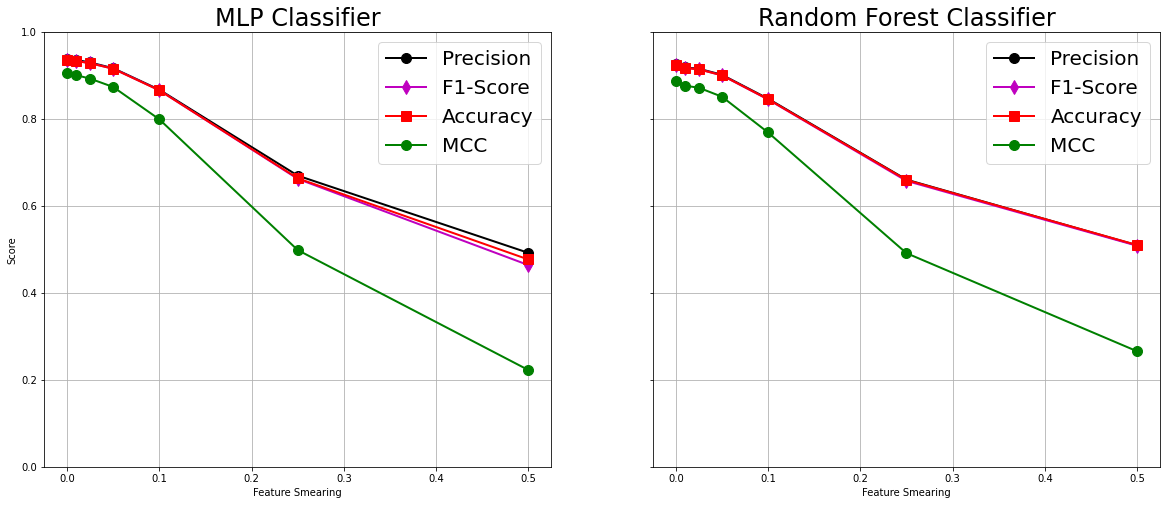

In [4]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
fig.set_size_inches(20,8)
plt.rcParams.update({'font.size': 20})

ax[0].set_title('MLP Classifier')
ax[0].plot(smearing_values,scanned_mlp_scores['precision'],'k-o',linewidth=2.0,markersize=10,label='Precision')
ax[0].plot(smearing_values,scanned_mlp_scores['f1'],'m-d',linewidth=2.0,markersize=10,label='F1-Score')
ax[0].plot(smearing_values,scanned_mlp_scores['acc'],'r-s',linewidth=2.0,markersize=10,label='Accuracy')
ax[0].plot(smearing_values,scanned_mlp_scores['mcc'],'g-o',linewidth=2.0,markersize=10,label='MCC')

ax[0].set_xlabel(r'Feature Smearing')
ax[0].set_ylabel(r'Score')
ax[0].set_ylim(0.0,1.0)
ax[0].grid(True)
ax[0].legend()

ax[1].set_title('Random Forest Classifier')
ax[1].plot(smearing_values,scanned_rf_scores['precision'],'k-o',linewidth=2.0,markersize=10,label='Precision')
ax[1].plot(smearing_values,scanned_rf_scores['f1'],'m-d',linewidth=2.0,markersize=10,label='F1-Score')
ax[1].plot(smearing_values,scanned_rf_scores['acc'],'r-s',linewidth=2.0,markersize=10,label='Accuracy')
ax[1].plot(smearing_values,scanned_rf_scores['mcc'],'g-o',linewidth=2.0,markersize=10,label='MCC')

ax[1].set_xlabel(r'Feature Smearing')
ax[1].legend()
ax[1].set_ylim(0.0,1.0)
ax[1].grid(True)

plt.show()